In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:

# 1. Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

In [3]:
# 2. Define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')])


C:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:

# 3. Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8878 - loss: 0.3686 - val_accuracy: 0.9802 - val_loss: 0.0694
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9737 - loss: 0.0870 - val_accuracy: 0.9830 - val_loss: 0.0590
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9812 - loss: 0.0608 - val_accuracy: 0.9848 - val_loss: 0.0526
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9862 - loss: 0.0428 - val_accuracy: 0.9873 - val_loss: 0.0513
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9898 - loss: 0.0317 - val_accuracy: 0.9878 - val_loss: 0.0491
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9907 - loss: 0.0277 - val_accuracy: 0.9873 - val_loss: 0.0558
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9920 - loss: 0.0233 - val_accuracy: 0.9883 - val_loss: 0.0526
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9927 -

In [5]:
# 5. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test accuracy: {test_acc:.4f}")

# 6. Plot Accuracy & Loss
plt.figure(figsize=(12, 4))



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9794 - loss: 0.0862

✅ Test accuracy: 0.9838


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

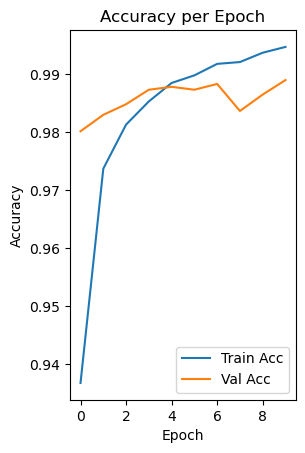

In [6]:
# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

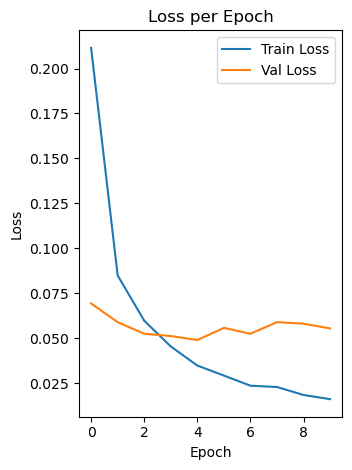

In [7]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# 7. Classification report
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



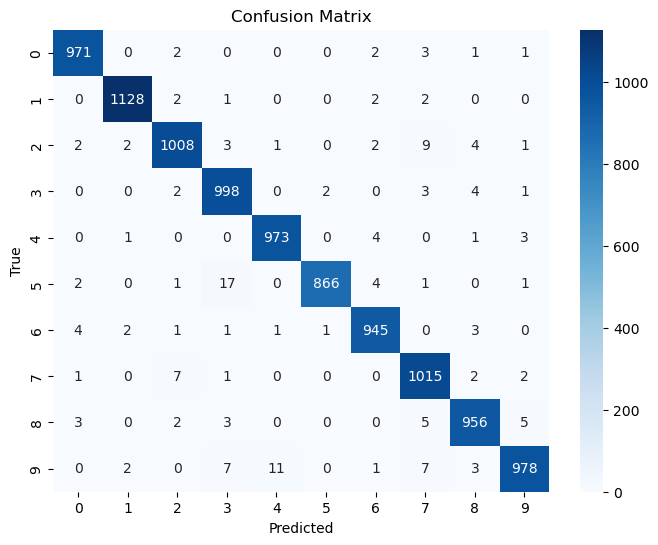

In [9]:

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


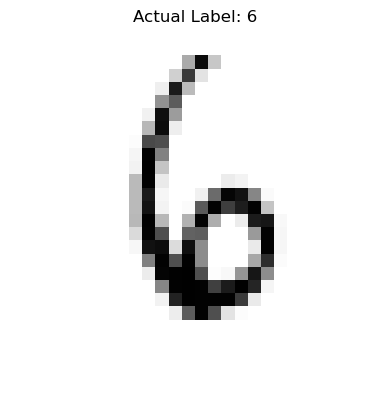

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
🔍 Predicted Label: 6


In [10]:
import matplotlib.pyplot as plt

# Pick any test image index
image_index = 6900

# Show the image
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
plt.title("Actual Label: {}".format(y_test[image_index]))
plt.axis('off')
plt.show()

# Predict the digit
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
predicted_class = pred.argmax()

print(f"🔍 Predicted Label: {predicted_class}")
